## **1. Introduction to Statistics in Python**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
food_consumption = pd.read_csv('../datasets/food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


### **1.1. Summary Statistics**

#### **Measures of center**

In [9]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']


# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

42.132727272727266
12.59


In [10]:
# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


In [11]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


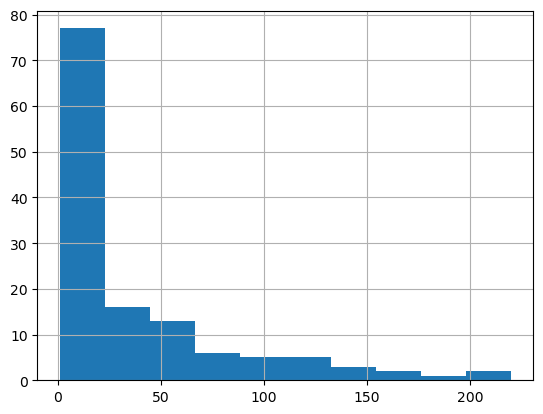

In [12]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

#### **Measures of spread**

### **1.2.Random Numbers and Probability**

### **1.3.More Distributions and the Central Limit Theorem**

### **1.4. Correlation and Experimental Design**